<a href="https://colab.research.google.com/github/TrashAlpha/AutoReg_GoldPricePredict/blob/main/ARModel_GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/goldPrice_everyDayFromYearAgo.csv',index_col=0,parse_dates=True)
X=df.dropna().values
print('Shape of data \t',df.shape)
print('Original Dataset:\n',df.head())
print('After Extracting only price:\n',X)

Shape of data 	 (217, 1)
Original Dataset:
             Gold (USD/t.oz)
Tanggal                    
2024-01-02             2059
2024-01-03             2041
2024-01-04             2043
2024-01-05             2046
2024-01-08             2028
After Extracting only price:
 [[2059]
 [2041]
 [2043]
 [2046]
 [2028]
 [2030]
 [2034]
 [2028]
 [2049]
 [2055]
 [2028]
 [2006]
 [2023]
 [2029]
 [2021]
 [2029]
 [2013]
 [2020]
 [2018]
 [2032]
 [2036]
 [2037]
 [2055]
 [2039]
 [2025]
 [2036]
 [2034]
 [2033]
 [2024]
 [2020]
 [1992]
 [1992]
 [2004]
 [2013]
 [2018]
 [2024]
 [2025]
 [2024]
 [2036]
 [2031]
 [2030]
 [2035]
 [2043]
 [2083]
 [2115]
 [2128]
 [2148]
 [2159]
 [2176]
 [2183]
 [2158]
 [2174]
 [2161]
 [2156]
 [2160]
 [2157]
 [2186]
 [2181]
 [2164]
 [2171]
 [2179]
 [2194]
 [2232]
 [2250]
 [2280]
 [2299]
 [2289]
 [2330]
 [2353]
 [2334]
 [2373]
 [2344]
 [2343]
 [2383]
 [2377]
 [2368]
 [2380]
 [2392]
 [2334]
 [2323]
 [2316]
 [2331]
 [2338]
 [2333]
 [2291]
 [2324]
 [2304]
 [2301]
 [2326]
 [2315]
 [2309]
 [

<Axes: xlabel='Tanggal'>

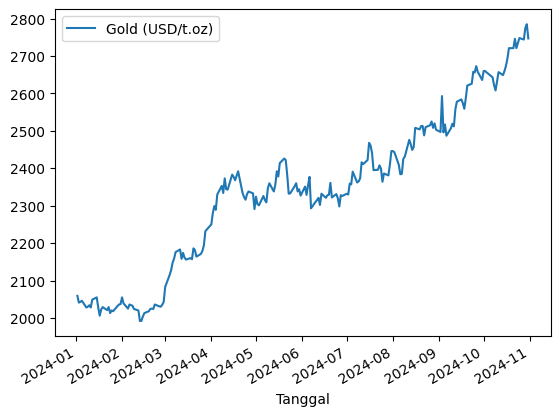

In [ ]:
df.plot()

In [ ]:
# Uji Augmented Dickey-Fuller (ADF) pada data asli
dftest = adfuller(df['Gold (USD/t.oz)'], autolag = 'AIC')

print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical values :")
for key, val in dftest[4].items():
  print("\t",key, ": ",val)

1. ADF :  0.0039786222018425915
2. P-Value :  0.958859881163569
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation :  215
5. Critical values :
	 1% :  -3.461136478222043
	 5% :  -2.875078880098608
	 10% :  -2.5739861168199027


In [ ]:
# Karena p-value > 0.05 lakukan differencing
gold_prices = df['Gold (USD/t.oz)']
gold_prices_diff = gold_prices.diff().dropna().values

print('Shape of data \t',gold_prices_diff.shape)
print('Gold Price:\n',gold_prices_diff)

dftest_diff = adfuller(gold_prices_diff, autolag = 'AIC')

print("1. ADF : ", dftest_diff[0])
print("2. P-Value : ", dftest_diff[1])
print("3. Num Of Lags : ", dftest_diff[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation : ", dftest_diff[3])
print("5. Critical values :")
for key, val in dftest_diff[4].items():
  print("\t",key, ": ",val)

Shape of data 	 (216,)
Gold Price:
 [-18.   2.   3. -18.   2.   4.  -6.  21.   6. -27. -22.  17.   6.  -8.
   8. -16.   7.  -2.  14.   4.   1.  18. -16. -14.  11.  -2.  -1.  -9.
  -4. -28.   0.  12.   9.   5.   6.   1.  -1.  12.  -5.  -1.   5.   8.
  40.  32.  13.  20.  11.  17.   7. -25.  16. -13.  -5.   4.  -3.  29.
  -5. -17.   7.   8.  15.  38.  18.  30.  19. -10.  41.  23. -19.  39.
 -29.  -1.  40.  -6.  -9.  12.  12. -58. -11.  -7.  15.   7.  -5. -42.
  33. -20.  -3.  25. -11.  -6.  38.  13. -22.  18.  36. -14.  36.  12.
  -4. -40. -50.   1.  19.   8. -22.   6. -17.  24. -22.  26.  22. -84.
  17.   5.   6. -19.  30. -11.   7.   1.  32. -39.   9. -11. -22.  30.
  -2.   6.  -2.  29.  -2.  34. -29.   3.   8.  43.  -5.  11.  46.  -7.
 -20. -46.   1.  12.  -9. -35.  22.  -5.  29.  36.   0.  -3. -34. -25.
   1.  40.   6.  45. -12. -15.   8.  51.  -4.   9.   0. -25.  22.   5.
  10. -17.  12. -17.  -6.  96. -97.  21. -30.  20.  12.  -7.  46.  20.
   6. -10. -15.  28.  34.   5.  32.  -2. 

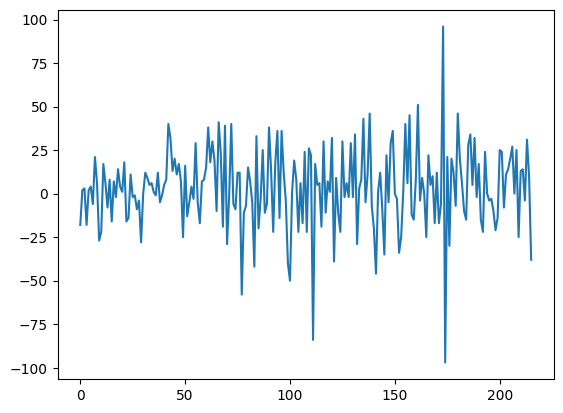

In [ ]:
pyplot.plot(gold_prices_diff)

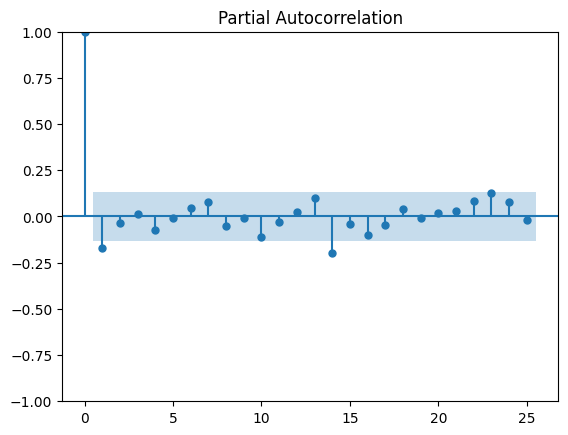

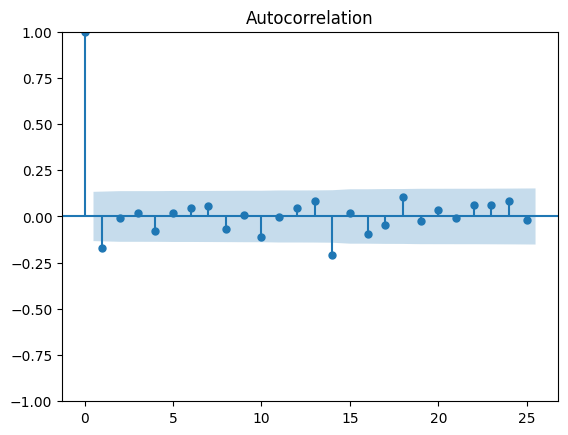

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(gold_prices_diff,lags=25)
acf=plot_acf(gold_prices_diff,lags=25)

In [ ]:
train_diff = gold_prices_diff[:len(gold_prices_diff)-5]
test_diff = gold_prices_diff[len(gold_prices_diff)-5:]

In [ ]:
model_diff = AutoReg(train_diff, lags=14).fit()

In [ ]:
print(model_diff.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  211
Model:                    AutoReg(14)   Log Likelihood                -888.710
Method:               Conditional MLE   S.D. of innovations             22.027
Date:                Thu, 05 Dec 2024   AIC                           1809.420
Time:                        09:43:07   BIC                           1861.952
Sample:                            14   HQIC                          1830.685
                                  211                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2593      1.885      2.790      0.005       1.565       8.954
y.L1          -0.1669      0.070     -2.394      0.017      -0.303      -0.030
y.L2          -0.0020      0.071     -0.029      0.9

In [ ]:
print(len(train_diff))

211


In [ ]:
pred_diff = model_diff.predict(start=len(train_diff), end=len(gold_prices_diff) - 1, dynamic=False)

In [ ]:
# Membandingkan prediksi differencing dengan data differencing asli
print("Prediksi (Differencing):", pred_diff)
print("Data Asli (Differencing):", test_diff)

Prediksi (Differencing): [ 0.82663544  8.86728822 10.67804304 -5.64080359 -1.22471094]
Data Asli (Differencing): [ 14.  -4.  31.  10. -38.]


[ 0.82663544  8.86728822 10.67804304 -5.64080359 -1.22471094]


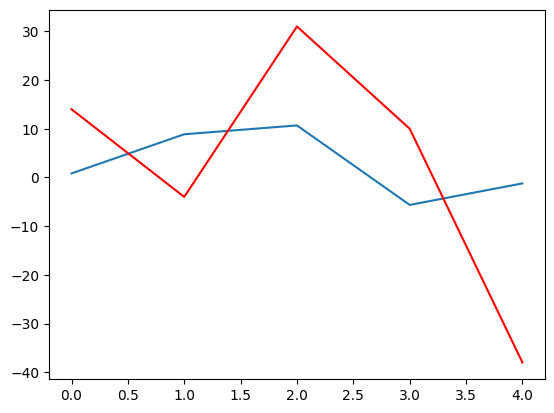

In [ ]:
from matplotlib import pyplot
pyplot.plot(pred_diff)
pyplot.plot(test_diff,color='red')
print(pred_diff)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_diff, pred_diff))
print(rmse)

21.675530890434413


In [ ]:
#prediksi 5 hari kedepan
pred_future_diff = model_diff.predict(start=len(gold_prices_diff), end=len(gold_prices_diff) + 4, dynamic=False)

In [ ]:
# Mengembalikan prediksi masa depan ke skala asli
pred_future_original = pred_future_diff.cumsum() + gold_prices.iloc[-1]

print("Prediksi Masa Depan:")
print(pred_future_original)
print("Jumlah Prediksi Masa Depan:", len(pred_future_original))

Prediksi Masa Depan:
[2747.73886118 2752.42981419 2753.59088553 2759.72321348 2758.21236603]
Jumlah Prediksi Masa Depan: 5
